<a href="https://colab.research.google.com/github/TyreBeard/stamp-prices/blob/main/Tyre'_BeardProject11End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastCarts Transaction Prediction

## Evaluation Metric:

Accuracy, using Gaussian Naive Bayes classifican


## Business problem.
A well known company FastCarts wants to improve its customer engagement and optimize marketing efforts by predicting whether a future customer will make a transaction.
## Data Science problem.
This is a Supervised classification problem. The target column is binary, 0s and 1s representing whether or not a future customer will make a transaction based on historical transaction data.

## Goal
Given historical transaction data, the goal is to develop a predictive model that can classify potential customers into two categories: those who are likely to make a transaction and those who are not.

## Challenges:

Imbalanced data customers who make transactions are fewer than those who don’t

## Data Collection/Sources


### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

### File Path
- for train and test data.

In [ ]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_path = base_path + 'Transaction.train.csv'
test_path = base_path + 'Transaction.test.csv'

- Lets give them a test.

In [ ]:
test_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.test.csv'

In [ ]:
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

- Okay now lets get loaded.

### Load Data
- Here we will load the data into a DataFrame and just take a look at the first
  few rows to make sure everything looks good.
- we notice the var colums are floating point, non categorical.
- The target column has 0s and 1s, categorical.

In [ ]:
train_orig = pd.read_csv(train_path)
train_orig.head() # displays first few rows

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


- There are 1800,000 rows and 53 columns

In [ ]:
train_orig.shape # Print the dimensions of the DataFrame

(180000, 53)

- Here we can see the important column information including the min, max, mean, standarded deviation and count.

In [ ]:
train_orig.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


- Lets check for nulls
- We see there are 0 nulls

In [ ]:
train_orig.isnull().sum() # Check for null values

,0
Unnamed: 0,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0


- We have a memory usage of 72.8+MB

In [ ]:
train_orig.info() # Data types and memory usage
                  # reads data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

## Data Cleaning


- Lets start off by checking for duplicates

In [ ]:
train_orig.duplicated().sum()

0

- Checking for missing values

In [ ]:
nested_rows = pd.DataFrame.map(train_orig, lambda x: isinstance(x, list)).any(axis=1)
nested_rows.sum()

0

## Exploratory Data Analysis


- This is a Supervised problem so lets check the targets data type- 1s and 0s
- This is a binary ML process

In [ ]:
unique_targets = train_orig['target'].unique()
unique_targets # the target values are 0s and 1s categorical

array([0, 1])

- lets check the distribution of target values.
- There are 143,920 more No's = 0 vs. Yeses =1

In [ ]:
train_orig['target'].value_counts()

,count
target,
0,161960
1,18040


- another view of the different data typre

In [ ]:
train_orig.dtypes

,0
Unnamed: 0,int64
ID_code,object
target,int64
var_0,float64
var_1,float64
var_2,float64
var_3,float64
var_4,float64
var_5,float64
var_6,float64


## Processing


- we will train and test data to account for the bariance/bias trade-off

In [ ]:
train_orig_dr = train_orig.drop(['ID_code', 'target'], axis=1, inplace=False)

In [ ]:
X = train_orig_dr
y = train_orig['target']

- the training accuracy is higher than test

In [ ]:
# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train accuracy: ", train_accuracy)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Train accuracy:  0.9040222222222222
Accuracy: 0.9034888888888889


## Data Visualization/Communication of Results


### Gaussian Naive Bayes classifican

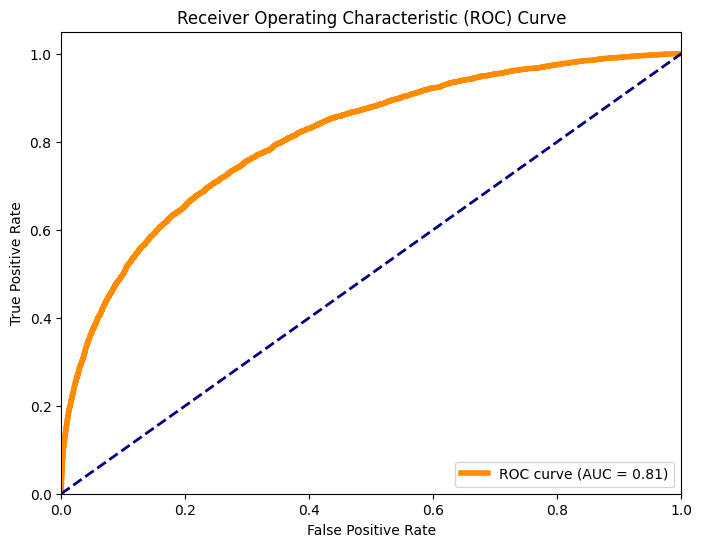

In [ ]:
# Split the data into training and testing sets
X = train_orig_dr  # features
y = train_orig['target']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = gnb.predict_proba(X_test)[:, 1]  # Probabilities for class 1


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=4, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

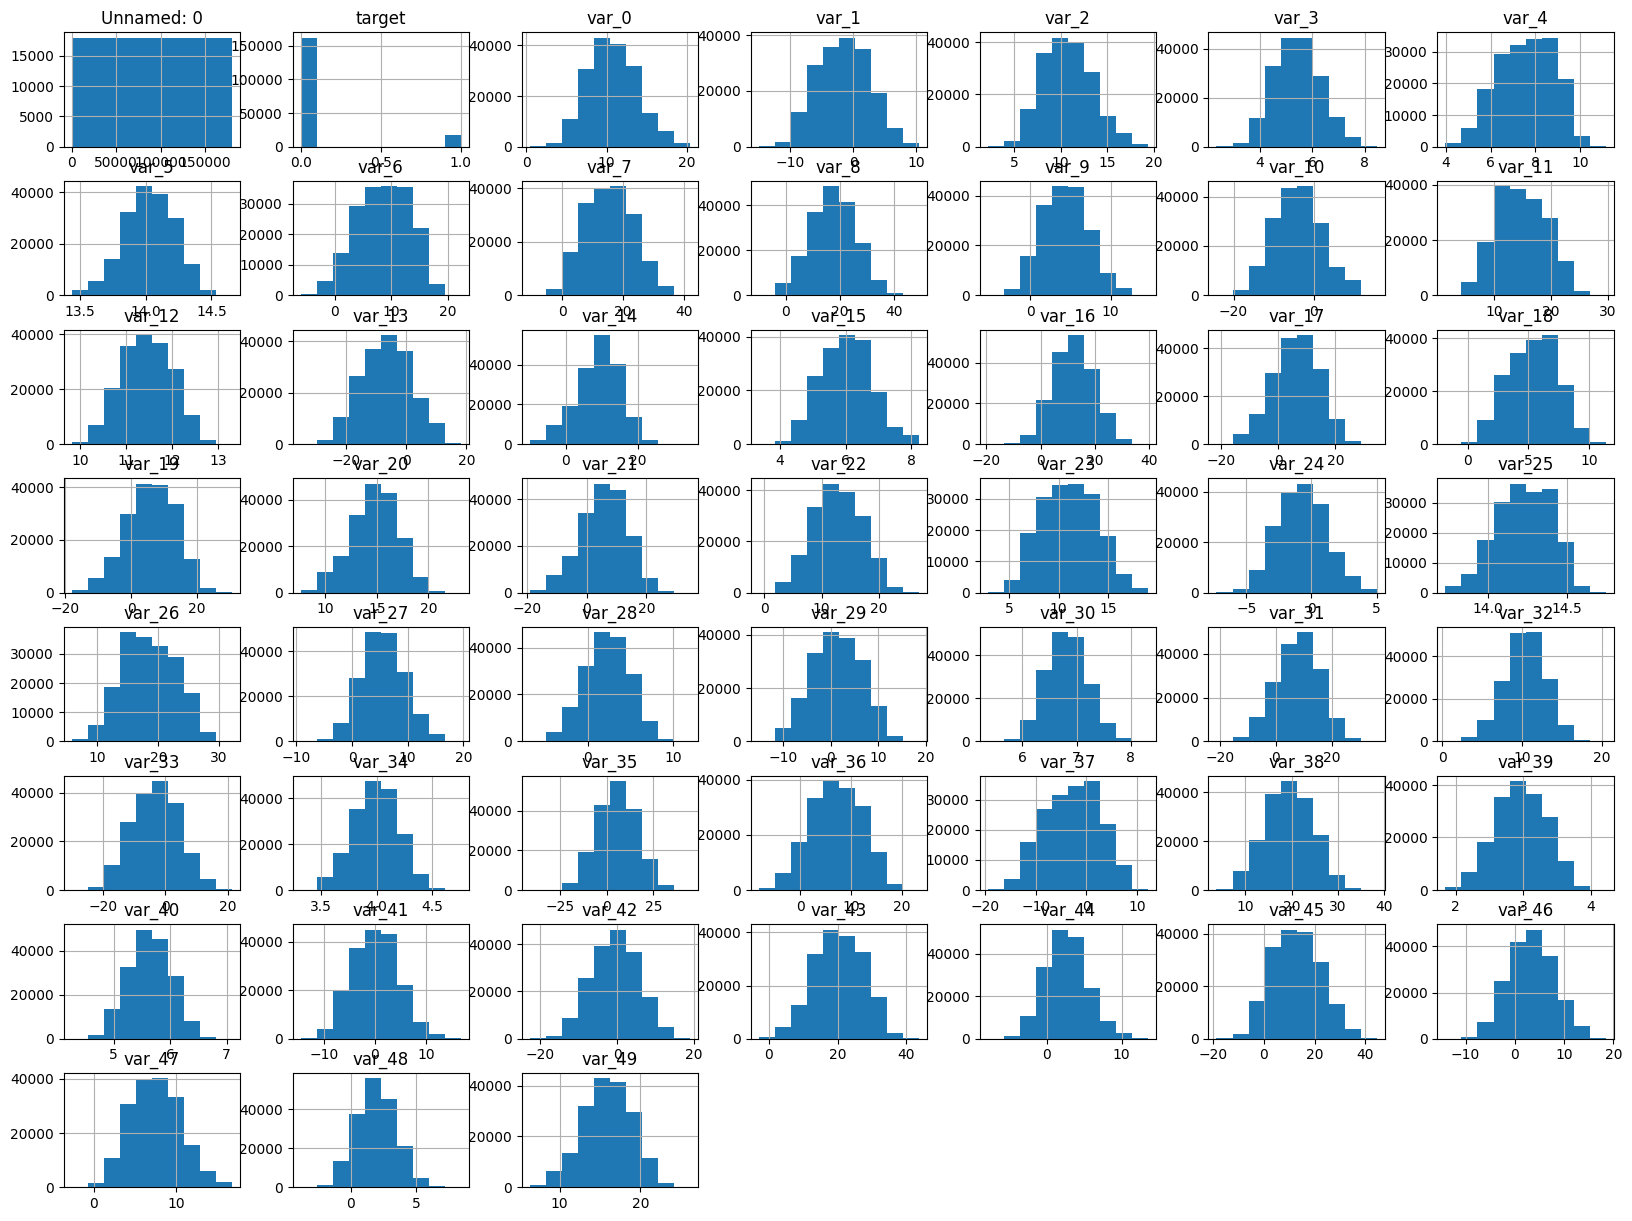

In [ ]:
train_orig.hist(figsize=(20, 15))
plt.show()

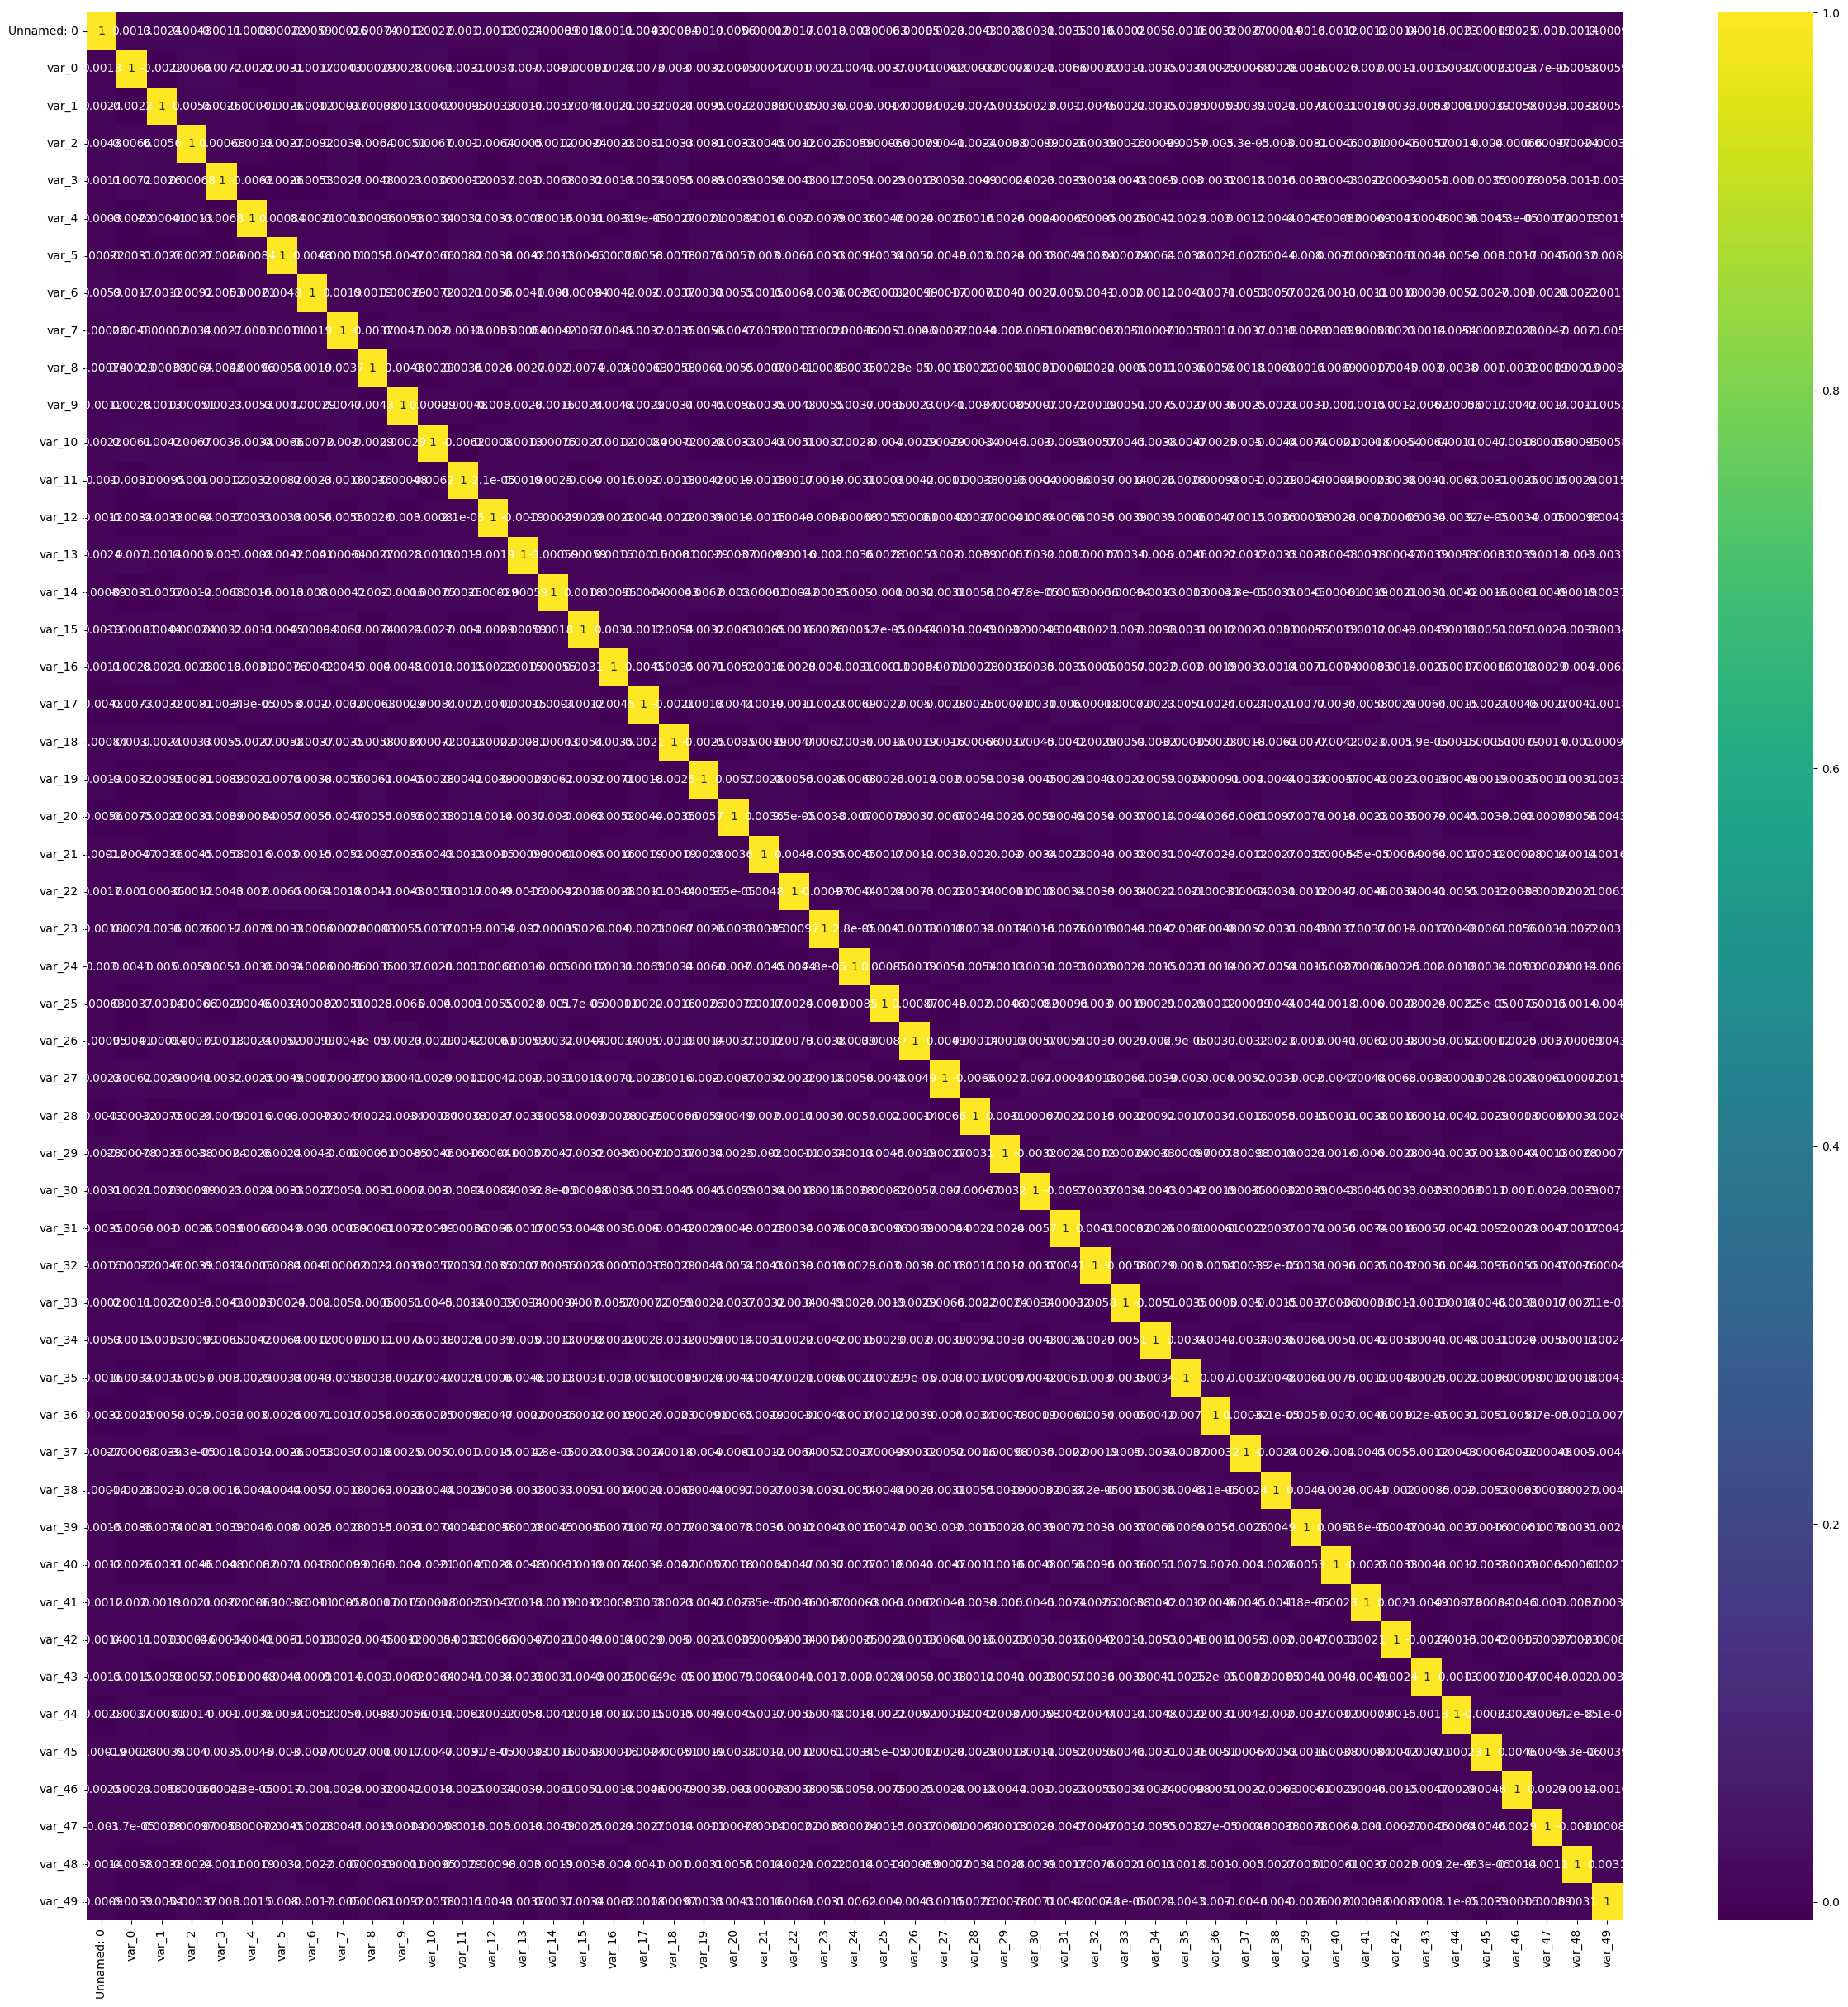

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(train_orig_dr.corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
train_orig_dr_std = (train_orig_dr - np.mean(train_orig_dr, axis=0))/np.std(train_orig_dr, axis=0)

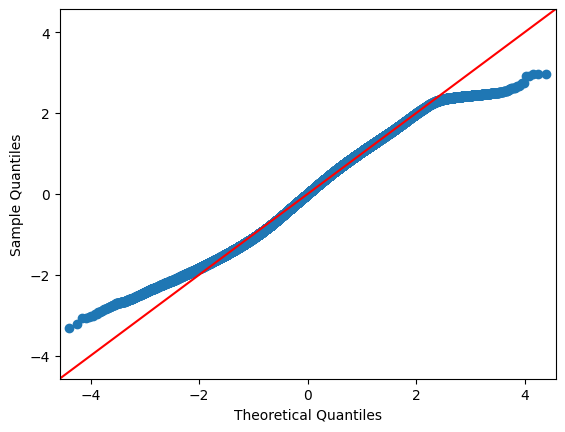

In [ ]:
sm.qqplot(train_orig_dr_std['var_1'],line='45')
plt.show()

##Conclusion

- In this project, given historical transaction data. We were able to build a model that can predict customer behavior with a 90 percent accuracy by using Gaussian Naive Bayes classification techniques.


- Our findings indicate that certain transaction patterns, can predict there future purchases.



- While the model demonstrates an 90 percent accuracy, further improvements can be made by continiously tracking customer behavior and improving ways to handle the inbalance of data.
